In [871]:
import numpy as np
import matplotlib.pyplot as plt
import func

In [872]:
# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

In [873]:
# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    train_set.append((image, label))

# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    test_set.append((image, label))

In [874]:
train_x = np.zeros((num_of_train_images, 784))
train_y = np.zeros((num_of_train_images, 10))
for i in range(num_of_train_images):
    train_x[i] = train_set[i][0].T
    train_y[i] = train_set[i][1].T

train_x = train_x.reshape(train_x.shape[0],-1).T
train_y = train_y.reshape(train_y.shape[0],-1).T 

print(train_x.shape)


test_x = np.zeros((num_of_test_images, 784))
test_y = np.zeros((num_of_test_images, 10))
for i in range(num_of_test_images):
    test_x[i] = test_set[i][0].T
    test_y[i] = test_set[i][1].T
    
test_x = test_x.reshape(test_x.shape[0],-1).T
test_y = test_y.reshape(test_y.shape[0],-1).T

f_set = np.array(train_x.T[0:100].T)
f_set_y = np.array(train_y.T[0:100].T)
print(f_set.shape)
print(f_set_y.shape)


(784, 60000)
(784, 100)
(10, 100)


In [875]:
# np.random.seed(2)
def initialize_parameters(layer_dims):
#     np.random.seed(45)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01 
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

# Second step

In [876]:
def L_model_forward(X, parameters, activation):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L + 1):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        cache = (A_prev, W, b, Z)
        if activation == "sigmoid":
            A = func.sigmoid(Z)
        elif activation == "relu":
            A = func.relu(Z)

        caches.append(cache)

    AL = A
    return AL, caches

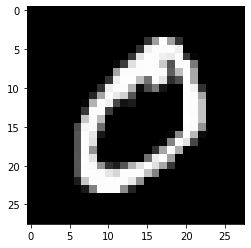

accuracy = 10%


In [885]:
# Plotting an image
show_image(train_set[1][0])
plt.show()

# second step
layer_dim = [784, 16, 16, 10]
param = initialize_parameters(layer_dim)
ans, c = L_model_forward(f_set, param, "sigmoid")

yhat = np.argmax(ans, axis=0)
y = np.argmax(f_set_y, axis=0)
# print(yhat)
correct = np.count_nonzero(y - yhat == 0)
acc = (correct/f_set_y.shape[1])*100

print("accuracy = {:.2g}%".format(acc))


# Third step

In [877]:
def compute_cost(AL, Y):

    m = Y.shape[1]
    
    cost = np.sum((AL - Y)**2)

    cost = np.squeeze(cost)  # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    return cost


In [886]:
def initialize_grads(layer_dim):
    grads = {}
    L = len(layer_dim)

    for l in range(1, L):
        grads['dW' + str(l)] = np.zeros((layer_dim[l], layer_dim[l-1]))
        grads['db' + str(l)] = np.zeros((layer_dim[l], 1))
        grads['dA' + str(l)] = np.zeros((layer_dim[l], 1))
        
#     grads['dA' + str(L-1)] = np.zeros((layer_dim[L-1], 1))
    
    return grads
    

In [972]:
def L_model_backward(AL, Y, caches, activation, layer_dim, grads):

    L = len(caches) 
    
    Y = Y.reshape(AL.shape) 
    
    current_cache = caches[L-1]
    #for dAL
    for i in range(layer_dim[L]):
        grads['dA' + str(L)][i] = (2 * AL[i] - 2 * Y[i])
        
     
    for l in reversed(range(1, L + 1)): 
        
        current_cache = caches[l-1]
      
        dZ = np.zeros((layer_dim[l], 1))
        
        
        if activation == "relu":
            for i in range(layer_dim[l]):
                dZ[i] += func.relu_backward(grads['dA' + str(l)][i], current_cache[3][i])
                

        elif activation == "sigmoid":
            for i in range(layer_dim[l]):
                dZ[i] += func.sigmoid_backward(grads['dA' + str(l)][i], current_cache[3][i])
               
     
        
        for i in range(layer_dim[l]):
            for j in range(layer_dim[l-1]):
                grads["dW" + str(l)][i,j] += dZ[i] * current_cache[0][j] 
        
        for i in range(layer_dim[l]):
             grads["db" + str(l)][i] = dZ[i]

        if l != 1:
#         grads["dA" + str(L - 1)] = np.zeros((layer_dim[L-2], m))
            for i in range(layer_dim[l-1]):
                for j in range(layer_dim[l]):
                    grads["dA" + str(l - 1)][i] += current_cache[1][j, i] * dZ[j] 


        
    return grads

In [888]:
def update_parameters(parameters, grads, learning_rate, batch_size):
    
    L = len(parameters) // 2 
        
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l + 1)]/batch_size)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l + 1)]/batch_size)
    
    
    return parameters 

In [973]:
def model(X, Y, num_epochs, learning_rate, batch_size):
    
    layer_dim = [784, 16, 16, 10]
    param = initialize_parameters(layer_dim)
   
    
    costs = []
    
    yhat = np.zeros((10, X.shape[1]))
    
    for i in range(num_epochs):
        for j in range(int(X.shape[1]/batch_size)):
            train_x = X.T[j * batch_size: (j+1) * batch_size].T
            train_y = Y.T[j * batch_size: (j+1) * batch_size].T
            
#             print(j)
            grads = initialize_grads(layer_dim)
            for k in range(batch_size):
                data_x = train_x.T[k].T
                data_x = data_x.reshape(784, 1)
                data_y = train_y.T[k].T
                data_y = data_y.reshape(10, 1)
                
                AL, c = L_model_forward(data_x, param, "sigmoid")
                yhat[: , j * batch_size + k:j * batch_size + k + 1] = AL
                cost = compute_cost(AL , data_y)
                grads = L_model_backward(AL, data_y, c, "sigmoid", layer_dim, grads)


            param = update_parameters(param, grads, learning_rate, batch_size)
     
    
        print(cost)
        costs.append(cost)
    
    
    correct = 0
    for i in range(X.shape[1]):
        AL, c = L_model_forward(X[:,i:i+1], param, "sigmoid")  
        indexi = np.argmax(AL)
        y = np.argmax(Y[:,i:i+1])
        if indexi == y:
            correct += 1
    
    acc = (correct/Y.shape[1])*100


    print("accuracy = {:.2g}%".format(acc))
    
        


        
    return costs


In [974]:
import time
strat = time.time()
f_set = train_x.T[:100].T
f_set_y = train_y.T[:100].T
c = model(f_set, f_set_y, 20, 1, 10)
end = time.time()

0.8768893074775704
0.8722932785065243
0.8698999718576552
0.8676490538571039
0.8654994628819108
0.8634546527487453
0.8615121617754155
0.859664866074942
0.8579031191615729
0.85621642046229
0.8545946629617798
0.8530290852756236
0.851513008172571
0.8500423558103273
0.8486158863122424
0.8472350209680661
0.8459031860903475
0.8446246358935805
0.8434027811846339
0.842238224715895
accuracy = 13%


In [975]:
print("time =", (end - strat)/60 , "minute")

time = 5.302299543221792 minute


In [804]:
def plot_result(info): 
#   print(len(info))
  plt.plot([i for i in range(1,len(info)+1)] , info , label='cost')
  plt.legend(loc="upper right", frameon=False)
  plt.show()
 


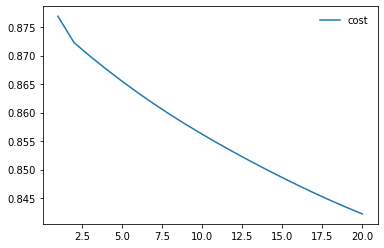

In [976]:
plot_result(c)

# 4th step

In [955]:
def L_model_backward_V(AL, Y, caches, activation, layer_dim, grads):

    L = len(caches) # the number of layers 
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    current_cache = caches[L-1]
    #for dAL
    grads['dA' + str(L)] = (2 * AL - 2 * Y)
        
     
    for l in reversed(range(1, L + 1)): 
        
        current_cache = caches[l-1]
      
        dZ = np.zeros((layer_dim[l], 1))
        
        
        if activation == "relu":
            dZ = func.relu_backward(grads['dA' + str(l)], current_cache[3])
#             for i in range(layer_dim[l]):
#                 dZ[i] += grads['dA' + str(l)][i] * funcs.relu_backward(grads['dA' + str(l)][i], current_cache[3][i])
                

        elif activation == "sigmoid":
            dZ =  func.sigmoid_backward(grads['dA' + str(l)], current_cache[3])
#             for i in range(layer_dim[l]):
#                 dZ[i] += grads['dA' + str(l)][i] * funcs.sigmoid_backward(grads['dA' + str(l)][i], current_cache[3][i])
               
#         print("grads:", np.sum(grads["dW" + str(l)]), grads["db" + str(l)] )
        grads["dW" + str(l)] += dZ @ np.transpose(current_cache[0])
        grads["db" + str(l)] = dZ
        if l != 1:
            grads["dA" + str(l - 1)] = np.transpose(current_cache[1]) @ dZ
    


        
    return grads

In [956]:
def model_V(X, Y, num_epochs, learning_rate, batch_size):
    
    layer_dim = [784, 16, 16, 10]
    param = initialize_parameters(layer_dim)
   
    costs = []
    
    yhat = np.zeros((10, X.shape[1]))
    
    for i in range(num_epochs):
        for j in range(int(X.shape[1]/batch_size)):
            train_x = X[: , j * batch_size: (j+1) * batch_size]
            train_y = Y[: , j * batch_size: (j+1) * batch_size]

            grads = initialize_grads(layer_dim)
            for k in range(batch_size):
                data_x = train_x[:,k:k+1]
                data_y = train_y[:,k:k+1]
                
                AL, c = L_model_forward(data_x, param, "sigmoid")
#                 yhat[: , j * batch_size + k:j * batch_size + k + 1] = AL
                cost = compute_cost(AL , data_y)
            

                grads = L_model_backward_V(AL, data_y, c, "sigmoid", layer_dim, grads)


            param = update_parameters(param, grads, learning_rate, batch_size)
    
        print(cost)
        costs.append(cost)
    
    correct = 0
    for i in range(X.shape[1]):
        AL, c = L_model_forward(X[:,i:i+1], param, "sigmoid")  
        indexi = np.argmax(AL)
        y = np.argmax(Y[:,i:i+1])
        if indexi == y:
            correct += 1
    

 
    acc = (correct/Y.shape[1])*100

    print("\n\naccuracy = {:.2g}%".format(acc))
    
        


        
    return costs, param

In [957]:
start2 = time.time()
f_set = train_x.T[:100].T
f_set_y = train_y.T[:100].T
c, p = model_V(f_set, f_set_y, 200, 1, 10)
end2 = time.time()

0.8729331363848696
0.8560972548347515
0.8508321830611582
0.8488791971898711
0.8480285465059372
0.8475491623198078
0.8472119354014285
0.8469400248179146
0.8467032484017232
0.8464874365486524
0.8462849352323748
0.8460912205078852
0.8459034690490432
0.8457198581944222
0.8455391851791996
0.8453606451870126
0.8451836957365271
0.8450079708206898
0.8448332248985602
0.8446592953513201
0.8444860766435804
0.8443135020641511
0.8441415304691412
0.8439701363861084
0.843799302416596
0.8436290132392358
0.8434592507496217
0.843289990025466
0.8431211959059242
0.8429528200407939
0.8427847983101368
0.8426170485451515
0.842449468501663
0.8422819340515514
0.8421142975669569
0.8419463864786018
0.8417780019940282
0.841608917964653
0.8414388798927646
0.8412676040712295
0.8410947768499937
0.8409200540245961
0.8407430603429823
0.8405633891279538
0.8403806020137229
0.8401942287962125
0.8400037673980686
0.8398086839507714
0.839608412997835
0.8394023578248605
0.8391898909242248
0.8389703546044759
0.838743061757126

In [958]:
print("time =", (end2 - start2)/60 , "minute")

time = 0.3352854013442993 minute


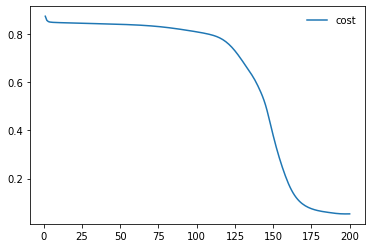

In [959]:
plot_result(c)

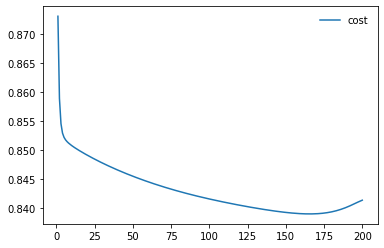

In [945]:
plot_result(c)

# 5th step

In [960]:
start3 = time.time()
#training
f_set = train_x
f_set_y = train_y
c, p = model_V(f_set, f_set_y, 5, 1, 50)


#test
correct = 0
for i in range(test_x.shape[1]):
    AL, cache = L_model_forward(test_x[:,i:i+1], p, "sigmoid")  
    indexi = np.argmax(AL)
    y = np.argmax(test_y[:,i:i+1])
    if indexi == y:
        correct += 1

     
acc = (correct/test_y.shape[1])*100

print("\n\naccuracy for test = {:.2g}%".format(acc))
end3 = time.time()

0.9139351213019384
0.9134173538752752
0.9371774116113276
0.8766694949760762
0.16803633386615294


accuracy = 89%


accuracy for test = 89%


In [961]:
print("time =", (end3 - start3)/60 , "minute")

time = 4.820506230990092 minute


# plot for training set

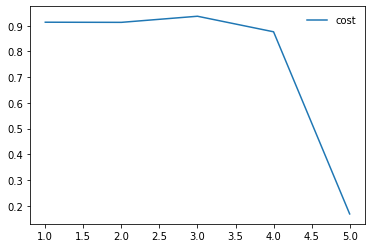

In [962]:

plot_result(c)

# امتیازی

In [690]:
def right_shift(im):
    for i in range(4):
        im = np.c_[im[:,-1],im[:,:-1]]
    return im    

In [697]:
shifted_test_set = []
for n in range(test_y.shape[1]):
    image = np.zeros((28,28))
    for i in range(784):
        image[i // 28][i % 28] = test_x[i:i+1 ,n:n+1]

    
    image = right_shift(image).flatten().reshape(-1,1)    
    

    shifted_test_set.append(image)

In [699]:
shifted_test_set_x = np.transpose(np.squeeze(np.array(shifted_test_set)))


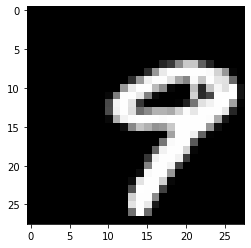

In [703]:
show_image(np.transpose(shifted_test_set_x[:,9]))
plt.show()

In [963]:
start4 = time.time()
#training
f_set = train_x
f_set_y = train_y
c, p = model_V(f_set, f_set_y, 5, 1, 50)


#test
correct = 0
for i in range(test_x.shape[1]):
    AL, cache = L_model_forward(shifted_test_set_x[:,i:i+1], p, "sigmoid")  
    indexi = np.argmax(AL)
    y = np.argmax(test_y[:,i:i+1])
    if indexi == y:
        correct += 1
     
acc = (correct/test_y.shape[1])*100
print("\n\naccuracy for test = {:.2g}%".format(acc))
end4 = time.time()

0.9138987006131666
0.9134001266787981
0.930390503304912
0.9310955397914067
0.7135111955377591


accuracy = 85%


accuracy for test = 27%


In [964]:
print("time =", (end4 - start4)/60 , "minute")

time = 4.828178262710571 minute


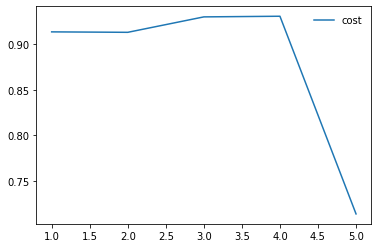

In [965]:
plot_result(c)

# امتیازی2

In [966]:
def L_model_forward_2(X, parameters, activation):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L + 1):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        cache = (A_prev, W, b, Z)
        if activation[l-1] == "sigmoid":
            A = func.sigmoid(Z)
        elif activation[l-1] == "relu":
            A = func.relu(Z)

        caches.append(cache)

    AL = A
    return AL, caches

In [967]:
def L_model_backward_2(AL, Y, caches, activation, layer_dim, grads):

    L = len(caches) # the number of layers 
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    current_cache = caches[L-1]
    #for dAL
    grads['dA' + str(L)] = (2 * AL - 2 * Y)
        
     
    for l in reversed(range(1, L + 1)): 
        
        current_cache = caches[l-1]
      
        dZ = np.zeros((layer_dim[l], 1))
        
        
        if activation[l-1] == "relu":
            dZ = func.relu_backward(grads['dA' + str(l)], current_cache[3])
#             for i in range(layer_dim[l]):
#                 dZ[i] += grads['dA' + str(l)][i] * funcs.relu_backward(grads['dA' + str(l)][i], current_cache[3][i])
                

        elif activation[l-1] == "sigmoid":
            dZ =  func.sigmoid_backward(grads['dA' + str(l)], current_cache[3])
#             for i in range(layer_dim[l]):
#                 dZ[i] += grads['dA' + str(l)][i] * funcs.sigmoid_backward(grads['dA' + str(l)][i], current_cache[3][i])
               
     
        grads["dW" + str(l)] += dZ @ np.transpose(current_cache[0])
        grads["db" + str(l)] = dZ
        if l != 1:
            grads["dA" + str(l - 1)] = np.transpose(current_cache[1]) @ dZ
    


        
    return grads

In [968]:
def model_V_2(X, Y, num_epochs, learning_rate, batch_size):
    
    layer_dim = [784, 16, 16, 10]
    param = initialize_parameters(layer_dim)
   
    costs = []
    
    yhat = np.zeros((10, X.shape[1]))
    
    for i in range(num_epochs):
        for j in range(int(X.shape[1]/batch_size)):
            train_x = X[: , j * batch_size: (j+1) * batch_size]
            train_y = Y[: , j * batch_size: (j+1) * batch_size]

            grads = initialize_grads(layer_dim)
            for k in range(batch_size):
                data_x = train_x[:,k:k+1]
                data_y = train_y[:,k:k+1]
                
                AL, c = L_model_forward_2(data_x, param, ["relu", "relu", "sigmoid"])
#                 yhat[: , j * batch_size + k:j * batch_size + k + 1] = AL
                cost = compute_cost(AL , data_y)
            

                grads = L_model_backward_V_2(AL, data_y, c, ["relu", "relu", "sigmoid"], layer_dim, grads)


            param = update_parameters(param, grads, learning_rate, batch_size)
    
        print(cost)
        costs.append(cost)
    
    correct = 0
    for i in range(X.shape[1]):
        AL, c = L_model_forward_2(X[:,i:i+1], param, ["relu", "relu", "sigmoid"])  
        indexi = np.argmax(AL)
        y = np.argmax(Y[:,i:i+1])
        if indexi == y:
            correct += 1
    

 
    acc = (correct/Y.shape[1])*100

    print("\n\naccuracy = {:.2g}%".format(acc))
    
        


        
    return costs, param

In [969]:
start5 = time.time()
#training
f_set = train_x
f_set_y = train_y
c, p = model_V(f_set, f_set_y, 5, 1, 50)


#test
correct = 0
for i in range(test_x.shape[1]):
    AL, cache = L_model_forward_2(test_x[:,i:i+1], p, ["relu", "relu", "sigmoid"])  
    indexi = np.argmax(AL)
    y = np.argmax(test_y[:,i:i+1])
    if indexi == y:
        correct += 1

     
acc = (correct/test_y.shape[1])*100

print("\n\naccuracy for test = {:.2g}%".format(acc))
end5 = time.time()

0.9139360977045908
0.9134408270671889
0.9433280315616888
0.8552986420721649
0.47965089125207794


accuracy = 88%


accuracy for test = 57%


In [970]:
print("time =", (end5 - start5)/60 , "minute")

time = 4.7692619880040485 minute


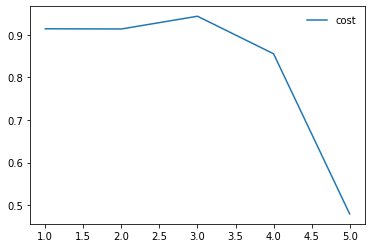

In [971]:
plot_result(c)